## Amit Lahat - Requesting Stocks/ETFs price data, strategy testing, results visualising

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import requests as req
import json
import datetime
import warnings
import time as tm
warnings.filterwarnings("ignore")

## Requesting data and cleaning 

In [2]:
# API is provided by "https://polygon.io/" using the free program. Please use your own link for further personal use.
Request_Date1 = '2023-04-04'
Request_Date2 = '2023-04-04'

#check to avoid weekends (for future loop, avoid entering sunday date)
year1, month1, day1 = Request_Date1.split('-')  
year1 = int(year1); month1 = int(month1); day1 = int(day1);
if datetime.date(year1,month1,day1).strftime('%A') == 'Saturday':
        Request_Date1 = (datetime.datetime.strptime(Request_Date1, '%Y-%m-%d') + datetime.timedelta(days=2)).strftime('%Y-%m-%d')
        Request_Date2 = (datetime.datetime.strptime(Request_Date2, '%Y-%m-%d') + datetime.timedelta(days=2)).strftime('%Y-%m-%d')
Request_string = 'https://api.polygon.io/v2/aggs/ticker/AAPL/range/5/minute/'+Request_Date1+'/'+Request_Date2+'?adjusted=true&sort=asc&apiKey=5msoPvKD_Vl1it_uorssQeitM0MnHdYF'
r = req.get(Request_string)
res = json.loads(r.content)
#if res['queryCount'] == 0:
#    Request_Date1 = (datetime.datetime.strptime(Request_Date, '%Y-%m-%d') + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
#    Request_Date2 = (datetime.datetime.strptime(Request_Date, '%Y-%m-%d') + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
#    continue
df = pd.DataFrame(res)
df1 = df[['ticker']].copy()
df1['OpenPrice'] = df['results'].apply(lambda x: x.get('o'))
df1['ClosePrice'] = df['results'].apply(lambda x: x.get('c'))
df1['Highp'] = df['results'].apply(lambda x: x.get('h'))
df1['Lowp'] = df['results'].apply(lambda x: x.get('l'))
df1['Volume'] = df['results'].apply(lambda x: x.get('v'))
df1['VWAP'] = df['results'].apply(lambda x: x.get('vw'))
df1['Time'] = df.results.apply(lambda x: datetime.datetime.fromtimestamp(int(x.get('t')) / 1000))
df1['Date'] = pd.to_datetime(df1['Time']).dt.date
df1['Time'] = pd.to_datetime(df1['Time']).dt.time
df1['Date'] = pd.to_datetime(df1['Date'])
df1

,ticker,OpenPrice,ClosePrice,Highp,Lowp,Volume,VWAP,Time,Date
0,AAPL,165.9100,165.80,165.91,165.8000,2282.0,165.8638,11:00:00,2023-04-04
1,AAPL,165.8900,165.89,165.89,165.8900,255.0,165.8883,11:05:00,2023-04-04
2,AAPL,165.8900,165.89,165.89,165.8900,174.0,165.8860,11:10:00,2023-04-04
3,AAPL,165.8800,165.90,165.90,165.8800,1522.0,165.8941,11:15:00,2023-04-04
4,AAPL,165.9000,165.90,165.90,165.9000,227.0,165.9098,11:20:00,2023-04-04
...,...,...,...,...,...,...,...,...,...
179,AAPL,165.7800,165.78,165.78,165.7800,928.0,165.7800,02:35:00,2023-04-05
180,AAPL,165.7900,165.85,165.85,165.7900,2856.0,165.8051,02:40:00,2023-04-05
181,AAPL,165.8101,165.82,165.84,165.8101,1800.0,165.8341,02:45:00,2023-04-05
182,AAPL,165.7800,165.75,165.78,165.7500,2302.0,165.7690,02:50:00,2023-04-05


### Filter standard trading hours (israel time)

In [3]:
df1['Time'] = pd.to_datetime(df1['Time'], format='%H:%M:%S')
df1 = df1[(df1['Time'].dt.time > pd.to_datetime('16:25:00', format='%H:%M:%S').time()) & (df1['Time'].dt.time < pd.to_datetime('23:00:00', format='%H:%M:%S').time())]
df1['Time'] = pd.to_datetime(df1['Time']).dt.time #return to time (object type)
df1

,ticker,OpenPrice,ClosePrice,Highp,Lowp,Volume,VWAP,Time,Date
62,AAPL,166.595,166.1550,166.7000,166.0620,1749413.0,166.4786,16:30:00,2023-04-04
63,AAPL,166.160,165.9400,166.3000,165.9400,1025193.0,166.1412,16:35:00,2023-04-04
64,AAPL,165.950,165.6000,165.9901,165.5200,947445.0,165.6965,16:40:00,2023-04-04
65,AAPL,165.600,165.9400,165.9900,165.4180,762776.0,165.7320,16:45:00,2023-04-04
66,AAPL,165.930,166.0199,166.1900,165.8650,803384.0,166.0678,16:50:00,2023-04-04
...,...,...,...,...,...,...,...,...,...
135,AAPL,165.530,165.3900,165.6269,165.3350,630264.0,165.4311,22:35:00,2023-04-04
136,AAPL,165.395,165.2400,165.4400,165.2200,571974.0,165.3359,22:40:00,2023-04-04
137,AAPL,165.250,165.1750,165.2701,165.1100,621145.0,165.1788,22:45:00,2023-04-04
138,AAPL,165.170,165.4700,165.5650,165.1501,829682.0,165.4335,22:50:00,2023-04-04


### Creating a loop and adding timed delay to accommodate API's restrictions

In [4]:
# Make sure the Request_Date1 isn't a sunday!!
# Change the Total_Req amount depending on the need.
Req_per_minute = 5 #can request using the api up to 5 times per minute.
delay = 70 / Req_per_minute
Total_Req = 1
Request_Date1 = '2023-07-05'
Request_Date2 = '2023-07-05'
Symbol = 'QQQ'
rowspull = 5000
df2 = pd.DataFrame()
for i in range(Total_Req):
    #check to avoid weekends
    year1, month1, day1 = Request_Date1.split('-')  
    year1 = int(year1); month1 = int(month1); day1 = int(day1);
    if datetime.date(year1,month1,day1).strftime('%A') == 'Saturday':
        Request_Date1 = (datetime.datetime.strptime(Request_Date1, '%Y-%m-%d') + datetime.timedelta(days=2)).strftime('%Y-%m-%d')
        Request_Date2 = (datetime.datetime.strptime(Request_Date2, '%Y-%m-%d') + datetime.timedelta(days=2)).strftime('%Y-%m-%d')
    Request_string = 'https://api.polygon.io/v2/aggs/ticker/'+Symbol+'/range/5/minute/'+Request_Date1+'/'+Request_Date2+'?adjusted=true&sort=asc&limit='+str(rowspull)+'&apiKey=5msoPvKD_Vl1it_uorssQeitM0MnHdYF'
    #Request data
    r = req.get(Request_string)
    res = json.loads(r.content)
    if res['queryCount'] == 0:  #avoid empty days
        Request_Date1 = (datetime.datetime.strptime(Request_Date1, '%Y-%m-%d') + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
        Request_Date2 = (datetime.datetime.strptime(Request_Date2, '%Y-%m-%d') + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
        continue
    df = pd.DataFrame(res)
    #Clean and organize
    df1 = df[['ticker']].copy()
    df1['OpenPrice'] = df['results'].apply(lambda x: x.get('o'))
    df1['ClosePrice'] = df['results'].apply(lambda x: x.get('c'))
    df1['Highp'] = df['results'].apply(lambda x: x.get('h'))
    df1['Lowp'] = df['results'].apply(lambda x: x.get('l'))
    df1['Volume'] = df['results'].apply(lambda x: x.get('v'))
    df1['VWAP'] = df['results'].apply(lambda x: x.get('vw'))
    df1['Time'] = df.results.apply(lambda x: datetime.datetime.fromtimestamp(int(x.get('t')) / 1000))
    df1['Date'] = pd.to_datetime(df1['Time']).dt.date
    df1['Time'] = pd.to_datetime(df1['Time']).dt.time
    df1['Date'] = pd.to_datetime(df1['Date'])
    #filter standard trading hours (israel time)
    df1['Time'] = pd.to_datetime(df1['Time'], format='%H:%M:%S')
    df1 = df1[(df1['Time'].dt.time > pd.to_datetime('16:25:00', format='%H:%M:%S').time()) & (df1['Time'].dt.time < pd.to_datetime('23:00:00', format='%H:%M:%S').time())]
    df1['Time'] = pd.to_datetime(df1['Time']).dt.time #return to time (object type)
    
    print(df1.Date.iloc[1]) #printing to see if/when loop gets stuck
    
    #concating the requests together to one big table (pre-made an empty df2)
    df2 = pd.concat([df1, df2])
    #update the date forward
    Request_Date1 = (datetime.datetime.strptime(Request_Date1, '%Y-%m-%d') + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
    Request_Date2 = (datetime.datetime.strptime(Request_Date2, '%Y-%m-%d') + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
    #Delay 
    tm.sleep(delay)
    if i + 1 == Total_Req:
        break  

2023-07-05 00:00:00


### Saving and concating pulled data

In [ ]:
df2.to_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\output7.csv', index=False)


In [ ]:
## Saving a few requests, concating, removing duplicates and saving as 1 big csv file

#df2.to_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\output1.csv', index=False)
#df2.to_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\output2.csv', index=False)
#df2.to_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\output3.csv', index=False)
dff1 = pd.read_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\output1.csv')
dff2 = pd.read_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\output2.csv')
dff3 = pd.read_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\output3.csv')

dff10 = pd.concat([dff1, dff2, dff3])
dff10.drop_duplicates().sort_values(by=['Date','Time']).to_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\QQQ2023_1-6.csv', index=False)

### ---------------------------------------------------------------------------------------------------------------------------------------------------------
### Loading previous data

In [5]:
QQQData = pd.read_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\QQQ2023_1-6.csv')


### Some analysis to create a profitable strategy

In [6]:
#Creating a custome column of the daily range (min to max price)
QQQDataDR = QQQData.groupby('Date').max('Highp')[['Highp']] - QQQData.groupby('Date').min('Highp')[['Highp']]
QQQDataDR.rename(columns={'Highp': 'Day_Range'}, inplace=True)
QQQData1 = pd.merge(QQQData, QQQDataDR, on = 'Date')
QQQData1

,ticker,OpenPrice,ClosePrice,Highp,Lowp,Volume,VWAP,Time,Date,Day_Range
0,QQQ,268.650,268.5400,269.230,267.56,1529316.0,268.4580,16:30:00,2023-01-03,7.6150
1,QQQ,268.580,269.4300,269.520,268.13,873871.0,268.8443,16:35:00,2023-01-03,7.6150
2,QQQ,269.430,269.1005,270.155,268.96,989867.0,269.6955,16:40:00,2023-01-03,7.6150
3,QQQ,269.120,267.4800,269.352,267.21,1198378.0,268.2096,16:45:00,2023-01-03,7.6150
4,QQQ,267.490,266.6300,267.830,266.45,984968.0,267.1574,16:50:00,2023-01-03,7.6150
...,...,...,...,...,...,...,...,...,...,...
9789,QQQ,370.910,370.7500,370.940,370.68,313357.0,370.7855,22:35:00,2023-07-05,2.1643
9790,QQQ,370.740,370.6999,370.930,370.65,324233.0,370.7704,22:40:00,2023-07-05,2.1643
9791,QQQ,370.680,370.9199,370.945,370.57,437122.0,370.7491,22:45:00,2023-07-05,2.1643
9792,QQQ,370.935,370.4100,370.935,370.40,729191.0,370.6725,22:50:00,2023-07-05,2.1643


In [7]:
# lets take the opening price of the second 5 minutes candle of the day and see by how much the price went up/down
QQQData1.groupby('Date').max('Highp')[['Highp']]
QQQData1.groupby('Date').min('Lowp')[['Lowp']]
QQQData1[QQQData1.Time=='16:35:00'][['Date','OpenPrice']]
QQQData2 = pd.merge(QQQData1.groupby('Date').max('Highp')[['Highp']], QQQData1[QQQData1.Time=='16:35:00'][['Date','OpenPrice']], on='Date')
QQQData2 = pd.merge(QQQData1.groupby('Date').min('Lowp')[['Lowp']], QQQData2, on='Date')
QQQData2.rename(columns={'Highp': 'Day_High','Lowp': 'Day_low','OpenPrice': 'C2OP'}, inplace=True)
QQQData2['GapToTop'] = QQQData2['Day_High'] - QQQData2['C2OP']
QQQData2['GapTobottom'] = QQQData2['C2OP'] - QQQData2['Day_low']
QQQData2

,Date,Day_low,Day_High,C2OP,GapToTop,GapTobottom
0,2023-01-03,262.1300,270.155,268.580,1.575,6.4500
1,2023-01-04,262.5300,267.450,265.405,2.045,2.8750
2,2023-01-05,261.2600,264.210,262.870,1.340,1.6100
3,2023-01-06,260.3400,269.940,264.150,5.790,3.8100
4,2023-01-09,269.9200,275.290,271.300,3.990,1.3800
...,...,...,...,...,...,...
121,2023-06-28,361.9038,366.520,362.890,3.630,0.9862
122,2023-06-29,362.1400,364.890,364.810,0.080,2.6700
123,2023-06-30,367.2300,370.490,367.760,2.730,0.5300
124,2023-07-03,368.9700,370.930,370.215,0.715,1.2450


In [8]:
# view the median and average (mean) of the gaps 
QQQData2[['GapToTop','GapTobottom']].describe()

,GapToTop,GapTobottom
count,126.000000,126.000000
mean,2.666238,2.268915
std,2.039194,1.693179
min,0.080000,0.170000
25%,1.083750,0.994825
50%,2.096250,1.760000
75%,3.748525,3.105000
max,9.800000,8.820000


### Prepare strategy to test

In [10]:
### R is a 'risk unit', meaning if i risk 1% of my money each trade than 1R=1%, if i profit is 10R than my money grew by 10%.
## Test strategy: filter days where the first candle is positive. 
## Enter position: Buy long position if price in following candles goes above 1st high point before it breaks the 1st low point.
# Testing 1 pair of values as GapToLoss and GapToProfit
test1 = QQQData[QQQData['Date'].isin(QQQData[(QQQData.OpenPrice<QQQData.ClosePrice) & (QQQData.Time=='16:30:00')]['Date'])]  #(filtered days)69 days of positive first candle

#creating a loop that use the indexes to check if price went up or broke below stop
row_1630 = test1[test1['Time'] == '16:30:00']
GapToLoss = 1 
GapToProfit = 2
daytestN = 0
EntryRow = 0
high_1630 = row_1630['Highp'].values[daytestN]
low_1630 = row_1630['Lowp'].values[daytestN]
NoEntryCount = 0 
EntriesCount = 0
LossCount = 0
WinCount = 0
for j in range (0, test1.Date.nunique()):
    high_1630 = row_1630['Highp'].values[daytestN]
    low_1630 = row_1630['Lowp'].values[daytestN]
    for i in range(row_1630.index[daytestN] + 1, row_1630.index[daytestN] + 1 + int(test1[test1.Date == test1.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):
        highp = test1.loc[i, 'Highp']
        lowp = test1.loc[i, 'Lowp']
        if lowp < (low_1630):
            NoEntryCount += 1
            break 
        elif highp > (high_1630):
            EntriesCount += 1
            EntryRow = i
            for k in range(EntryRow, row_1630.index[daytestN] + 1 + int(test1[test1.Date == test1.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):  #range from 2nd row till end of day
                highp = test1.loc[k, 'Highp']
                lowp = test1.loc[k, 'Lowp']
                if lowp <= (high_1630 - GapToLoss):
                    LossCount += 1
                    break
                elif highp >= (high_1630 + GapToProfit):
                    WinCount += 1
                    break
                else:
                    continue
            break
        else:
            continue
    daytestN += 1

print ("Dates tested:", QQQData[0:1].Date.values[0], "-", QQQData[-1:].Date.values[0])
print ("No entry count =", str(NoEntryCount)) ; print ("Entries count =", str(EntriesCount))
print ("Loss count =", str(LossCount)) ;  print ("Win count =", str(WinCount))
print ("trades that didn't close =", str(EntriesCount-LossCount-WinCount))
print ("Profit:",str(round(WinCount*(GapToProfit/GapToLoss)-LossCount,2))+"R")

Dates tested: 2023-01-03 - 2023-07-05
No entry count = 19
Entries count = 50
Loss count = 30
Win count = 18
trades that didn't close = 2
Profit: 6.0R


## Adding outer loops to test different gaps and ratios

In [11]:
# Also saving results for a future table.
TestRes = {'R_Profit': [],'Ratio': [], 'Gaps': [], 'Entries': [], 'wins': [], 'Losses': [], 'OpenTrades': [], 'StartDate': [], 'EndDate': []} #empty results dictionary to create dataframe later
test1 = QQQData[QQQData['Date'].isin(QQQData[(QQQData.OpenPrice<QQQData.ClosePrice) & (QQQData.Time=='16:30:00')]['Date'])]  #(filtered days)69 days of positive first candle
#creating a loop that use the indexes to check if price went up or broke below stop
row_1630 = test1[test1['Time'] == '16:30:00']
RatioMultiplier = 1 #starting at 1:1 ratio
RatioLimit = 4
GapToLoss = 0.5 #starting at 0.5, raising by 1/6 each time (gives both thirds and halves)
GapToProfit = GapToLoss*RatioMultiplier
GapToProfitLimit = 4
daytestN = 0
EntryRow = 0
high_1630 = row_1630['Highp'].values[daytestN]
low_1630 = row_1630['Lowp'].values[daytestN]
NoEntryCount = 0 
EntriesCount = 0
LossCount = 0
WinCount = 0
while RatioMultiplier <= RatioLimit:  #Loop to test different ratios
    GapToLoss = 0.5
    GapToProfit = GapToLoss*RatioMultiplier
    while GapToProfit < GapToProfitLimit:  #Loop for testing gaps
        GapToProfit = GapToLoss*RatioMultiplier
        daytestN = 0
        EntryRow = 0
        high_1630 = row_1630['Highp'].values[daytestN]
        low_1630 = row_1630['Lowp'].values[daytestN]
        NoEntryCount = 0 
        EntriesCount = 0
        LossCount = 0
        WinCount = 0
        for j in range (0, test1.Date.nunique()):  #Loop to to set variables for each day
            high_1630 = row_1630['Highp'].values[daytestN]
            low_1630 = row_1630['Lowp'].values[daytestN]
            for i in range(row_1630.index[daytestN] + 1, row_1630.index[daytestN] + 1 + int(test1[test1.Date == test1.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):  #Loop to check entries
                highp = test1.loc[i, 'Highp']
                lowp = test1.loc[i, 'Lowp']
                if lowp < (low_1630):
                    NoEntryCount += 1
                    break 
                elif highp > (high_1630):
                    EntriesCount += 1
                    EntryRow = i
                    for k in range(EntryRow, row_1630.index[daytestN] + 1 + int(test1[test1.Date == test1.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):  #range from 2nd row till end of day  #Loop to check results
                        highp = test1.loc[k, 'Highp']
                        lowp = test1.loc[k, 'Lowp']
                        if lowp <= (high_1630 - GapToLoss):
                            LossCount += 1
                            break
                        elif highp >= (high_1630 + GapToProfit):
                            WinCount += 1
                            break
                        else:
                            continue
                    break
                else:
                    continue
            daytestN += 1
        # Recording loop results:
        TestRes['R_Profit'].append(round(WinCount*(GapToProfit/GapToLoss)-LossCount,2))
        TestRes['Ratio'].append('1:'+str(RatioMultiplier))
        TestRes['Gaps'].append(str(round(GapToLoss,2))+', '+str(round(GapToProfit,2)))
        TestRes['Entries'].append(EntriesCount)
        TestRes['wins'].append(WinCount)
        TestRes['Losses'].append(LossCount)
        TestRes['OpenTrades'].append(EntriesCount-LossCount-WinCount)
        TestRes['StartDate'].append(QQQData[0:1].Date.values[0])
        TestRes['EndDate'].append(QQQData[-1:].Date.values[0])
        GapToLoss += (1/6) #update loop forward
    RatioMultiplier += 0.25

In [12]:
results = pd.DataFrame(TestRes)
results

,R_Profit,Ratio,Gaps,Entries,wins,Losses,OpenTrades,StartDate,EndDate
0,2.0,1:1,"0.5, 0.5",50,26,24,0,2023-01-03,2023-07-05
1,0.0,1:1,"0.67, 0.67",50,25,25,0,2023-01-03,2023-07-05
2,2.0,1:1,"0.83, 0.83",50,26,24,0,2023-01-03,2023-07-05
3,0.0,1:1,"1.0, 1.0",50,25,25,0,2023-01-03,2023-07-05
4,2.0,1:1,"1.17, 1.17",50,26,24,0,2023-01-03,2023-07-05
...,...,...,...,...,...,...,...,...,...
124,11.0,1:4.0,"0.5, 2.0",50,12,37,1,2023-01-03,2023-07-05
125,-1.0,1:4.0,"0.67, 2.67",50,9,37,4,2023-01-03,2023-07-05
126,-10.0,1:4.0,"0.83, 3.33",50,7,38,5,2023-01-03,2023-07-05
127,-14.0,1:4.0,"1.0, 4.0",50,6,38,6,2023-01-03,2023-07-05


## Analysis and visualising results

In [13]:
# Cheking the max profit of the results per ratio tested
results.groupby('Ratio').max()[['R_Profit']] # Max R_Profit per ratio
MaxR_Ratio = pd.merge(results, results.groupby('Ratio').max()[['R_Profit']], on = ['Ratio','R_Profit']) #using merge to filter rows
MaxR_Ratio

,R_Profit,Ratio,Gaps,Entries,wins,Losses,OpenTrades,StartDate,EndDate
0,5.00,1:1,"4.0, 4.0",50,10,5,35,2023-01-03,2023-07-05
1,5.00,1:1.25,"1.17, 1.46",50,24,25,1,2023-01-03,2023-07-05
2,9.50,1:1.5,"1.17, 1.75",50,23,25,2,2023-01-03,2023-07-05
3,8.75,1:1.75,"0.83, 1.46",50,21,28,1,2023-01-03,2023-07-05
4,8.75,1:1.75,"1.0, 1.75",50,21,28,1,2023-01-03,2023-07-05
5,14.00,1:2.0,"0.83, 1.67",50,21,28,1,2023-01-03,2023-07-05
6,16.00,1:2.25,"0.83, 1.87",50,20,29,1,2023-01-03,2023-07-05
7,11.50,1:2.5,"0.83, 2.08",50,17,31,2,2023-01-03,2023-07-05
8,11.00,1:2.75,"0.67, 1.83",50,16,33,1,2023-01-03,2023-07-05
9,10.00,1:3.0,"0.5, 1.5",50,15,35,0,2023-01-03,2023-07-05


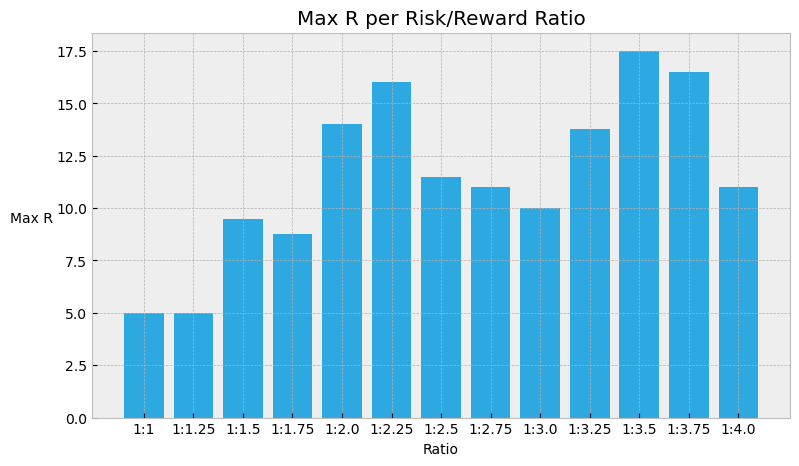

We learn that ratios below 1:1.5 are the least profitable by up to 3.5 times relative to other ratios.
Let's zoom in on the top 3 ratios next


In [14]:
plt.figure(figsize=(9,5))
plt.style.use('bmh')
plt.bar(MaxR_Ratio['Ratio'], MaxR_Ratio['R_Profit'], color='#2da8e0')
plt.title('Max R per Risk/Reward Ratio')
plt.xlabel('Ratio')
plt.ylabel('Max R', rotation=0, labelpad=18)

plt.show()
print ("We learn that ratios below 1:1.5 are the least profitable by up to 3.5 times relative to other ratios.")
print ("Let's zoom in on the top 3 ratios next")

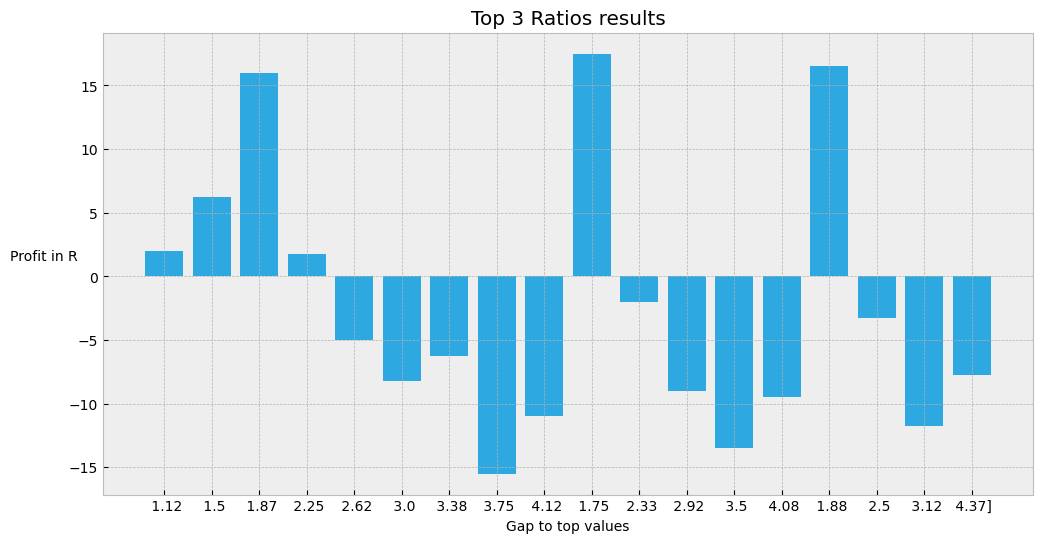

We can notice that once the gap to the profit point goes over 2$ our profit drops.
with an average of 2.67$ to top it can be understandable. Now to test again with smaller gap changes.


In [79]:
Top3Ratios = results[results['Ratio'].isin(['1:2.25', '1:3.5', '1:3.75'])]
plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.bar(str(list(Top3Ratios['Gaps'].values)).replace("'", "").split(',')[1::2], Top3Ratios['R_Profit'], color='#2da8e0') #X values are gap to top only for visibility
plt.title('Top 3 Ratios results')
plt.xlabel('Gap to top values')
plt.ylabel('Profit in R', rotation=0, labelpad=18)
plt.show()
print ("We can notice that once the gap to the profit point goes over 2$ our profit drops.")
print ("with an average of 2.67$ to top it can be understandable. Now to test again with smaller gap changes.")

### Testing from ratios of 1:2-4 and GapToProfit up to 2 (raising GapToLoss by 0.1 jumps)

In [80]:

test1 = QQQData[QQQData['Date'].isin(QQQData[(QQQData.OpenPrice<QQQData.ClosePrice) & (QQQData.Time=='16:30:00')]['Date'])]  #(filtered days)69 days of positive first candle

row_1630 = test1[test1['Time'] == '16:30:00']
TestRes = {'R_Profit': [],'Ratio': [], 'Gaps': [], 'Entries': [], 'wins': [], 'Losses': [], 'OpenTrades': [], 'StartDate': [], 'EndDate': []} #empty results dictionary to create dataframe later
RatioMultiplier = 2 #starting at 1:1 ratio
RatioLimit = 4
GapToLoss = 0.5 #starting at 0.5, raising by 1/6 each time (gives both thirds and halves)
GapToProfit = GapToLoss*RatioMultiplier
GapToProfitLimit = 2
daytestN = 0
EntryRow = 0
high_1630 = row_1630['Highp'].values[daytestN]
low_1630 = row_1630['Lowp'].values[daytestN]
NoEntryCount = 0 
EntriesCount = 0
LossCount = 0
WinCount = 0
while RatioMultiplier <= RatioLimit:  #Loop to test different ratios
    GapToLoss = 0.5
    GapToProfit = GapToLoss*RatioMultiplier
    while GapToProfit < GapToProfitLimit:  #Loop for testing gaps
        GapToProfit = GapToLoss*RatioMultiplier
        daytestN = 0
        EntryRow = 0
        high_1630 = row_1630['Highp'].values[daytestN]
        low_1630 = row_1630['Lowp'].values[daytestN]
        NoEntryCount = 0 
        EntriesCount = 0
        LossCount = 0
        WinCount = 0
        for j in range (0, test1.Date.nunique()):  #Loop to to set variables for each day
            high_1630 = row_1630['Highp'].values[daytestN]
            low_1630 = row_1630['Lowp'].values[daytestN]
            for i in range(row_1630.index[daytestN] + 1, row_1630.index[daytestN] + 1 + int(test1[test1.Date == test1.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):  #Loop to check entries
                highp = test1.loc[i, 'Highp']
                lowp = test1.loc[i, 'Lowp']
                if lowp < (low_1630):
                    NoEntryCount += 1
                    break 
                elif highp > (high_1630):
                    EntriesCount += 1
                    EntryRow = i
                    for k in range(EntryRow, row_1630.index[daytestN] + 1 + int(test1[test1.Date == test1.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):  #range from 2nd row till end of day  #Loop to check results
                        highp = test1.loc[k, 'Highp']
                        lowp = test1.loc[k, 'Lowp']
                        if lowp <= (high_1630 - GapToLoss):
                            LossCount += 1
                            break
                        elif highp >= (high_1630 + GapToProfit):
                            WinCount += 1
                            break
                        else:
                            continue
                    break
                else:
                    continue
            daytestN += 1
        # Recording loop results:
        TestRes['R_Profit'].append(round(WinCount*(GapToProfit/GapToLoss)-LossCount,2))
        TestRes['Ratio'].append('1:'+str(RatioMultiplier))
        TestRes['Gaps'].append(str(round(GapToLoss,2))+', '+str(round(GapToProfit,2)))
        TestRes['Entries'].append(EntriesCount)
        TestRes['wins'].append(WinCount)
        TestRes['Losses'].append(LossCount)
        TestRes['OpenTrades'].append(EntriesCount-LossCount-WinCount)
        TestRes['StartDate'].append(QQQData[0:1].Date.values[0])
        TestRes['EndDate'].append(QQQData[-1:].Date.values[0])
        GapToLoss += 0.1 #update loop forward
    RatioMultiplier += 0.25
    


In [81]:
results = pd.DataFrame(TestRes)
results.head()

,R_Profit,Ratio,Gaps,Entries,wins,Losses,OpenTrades,StartDate,EndDate
0,4.0,1:2,"0.5, 1.0",50,18,32,0,2023-01-03,2023-07-05
1,4.0,1:2,"0.6, 1.2",50,18,32,0,2023-01-03,2023-07-05
2,10.0,1:2,"0.7, 1.4",50,20,30,0,2023-01-03,2023-07-05
3,11.0,1:2,"0.8, 1.6",50,20,29,1,2023-01-03,2023-07-05
4,14.0,1:2,"0.9, 1.8",50,21,28,1,2023-01-03,2023-07-05


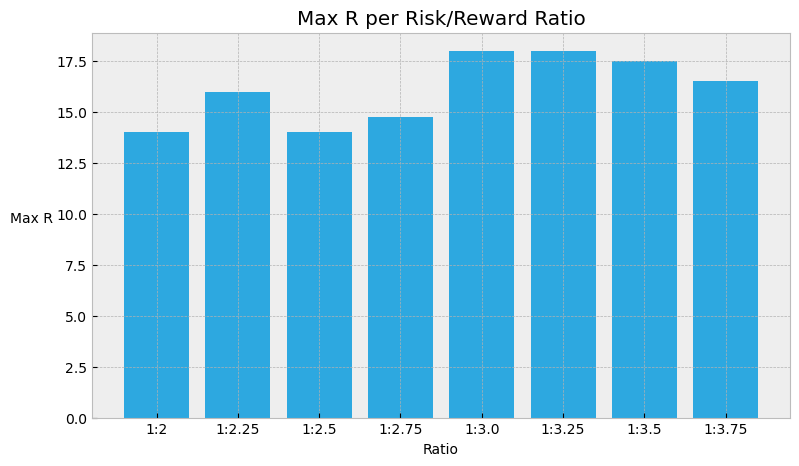

We optimized our results to 18R with 1:3/3.25 ratio.
we can also see better results in other ratios.


In [85]:
results.groupby('Ratio').max()[['R_Profit']] # Max R_Profit per ratio
MaxR_Ratio2 = pd.merge(results, results.groupby('Ratio').max()[['R_Profit']], on = ['Ratio','R_Profit']) #using merge to filter rows
MaxR_Ratio2
plt.figure(figsize=(9,5))
plt.style.use('bmh')
plt.bar(MaxR_Ratio2['Ratio'], MaxR_Ratio2['R_Profit'], color='#2da8e0')
plt.title('Max R per Risk/Reward Ratio')
plt.xlabel('Ratio')
plt.ylabel('Max R', rotation=0, labelpad=18)

plt.show()
print ("We optimized our results to 18R with 1:3/3.25 ratio.")
print ("we can also see better results in other ratios.")

In [86]:
# Best results:
print("I'd preffer the ratio of 1:3 for rounder numbers and a slightly higher win rate")
results[results['R_Profit']==results.R_Profit.max()]


I'd preffer the ratio of 1:3 for rounder numbers and a slightly higher win rate


,R_Profit,Ratio,Gaps,Entries,wins,Losses,OpenTrades,StartDate,EndDate
22,18.0,1:3.0,"0.6, 1.8",50,17,33,0,2023-01-03,2023-07-05
25,18.0,1:3.25,"0.6, 1.95",50,16,34,0,2023-01-03,2023-07-05


#### In conclusion we have a profitable strategy from the requested data and analysis, using a 1:3 risk/reward ratio.
#### Averaging 0.36R per trade with a win-rate of 34%


#### IMPORTANT NOTE: This is not a recommendation, you may freely use the code provided. However, when it comes to trading - use at your own risk. 